# Flask Project

In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import pickle




data = pd.read_csv('/workspaces/Israel-Flask-Project/Israel/data/CSR Nuclear Weapons Dataset - Consolidated-P5.csv')

data.head()

,Weapon System,Country,NATO Designation,Type,Replacement,Service,Mission,Introduced,Retired,Estimated dates,...,Policy/Status Detail,Source,Source 2,Source 3,Warhead family,Air,Sea,Ground,Unnamed: 20,Unnamed: 21
0,Mk-1 (Little Boy),US,NaN,Gravity bomb,NaN,Army Air Force,Early Strategic,1945,1950,NaN,...,NaN,"Hansen, Chuck (1995). Volume V: US Nuclear Wea...","Josserand, Terry Michael (2017). ""R&A for UUR_...",NaN,NaN,True,NaN,NaN,NaN,NaN
1,FM/Mod-0 (Fat Man),US,NaN,Gravity bomb,Mk-3 (Fat Man-Production),Army Air Force,Early Strategic,1945,1948,NaN,...,NaN,"Hansen, Chuck (1995). Volume V: US Nuclear Wea...","Josserand, Terry Michael (2017). ""R&A for UUR_...",NaN,NaN,True,NaN,NaN,NaN,NaN
2,Mk-3 (Fat Man-Production),US,NaN,Gravity bomb,"Mk-4 (Improved Fat Man), Mk-18 (Super Oralloy ...",Air Force,Early Strategic,1947,1950,NaN,...,NaN,"Hansen, Chuck (1995). Volume V: US Nuclear Wea...","Josserand, Terry Michael (2017). ""R&A for UUR_...",NaN,NaN,True,NaN,NaN,NaN,NaN
3,Mk-4 (Improved Fat Man),US,NaN,Gravity bomb,Mk-6 (Improved Fat Man),Air Force,Early Strategic,1949,1953,NaN,...,NaN,"Hansen, Chuck (1995). Volume V: US Nuclear Wea...",Sandia National Laboratory Information Researc...,"Josserand, Terry Michael (2017). ""R&A for UUR_...",NaN,True,NaN,NaN,NaN,NaN
4,RDS-1 (Pilot),RU,Joe-1,Gravity bomb,RDS-2 (Weaponized),Soviet Atomic Bomb Project,Early Strategic,1950,1951,True,...,NaN,"Podvig, Pavel, ed (2001). ""Soviet and Russian ...",NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [9]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weapon System         254 non-null    object 
 1   Country               254 non-null    object 
 2   NATO Designation      114 non-null    object 
 3   Type                  254 non-null    object 
 4   Replacement           125 non-null    object 
 5   Service               254 non-null    object 
 6   Mission               254 non-null    object 
 7   Introduced            254 non-null    int64  
 8   Retired               254 non-null    int64  
 9   Estimated dates       45 non-null     object 
 10  Confidence Level      254 non-null    object 
 11  Fate/Status           254 non-null    object 
 12  Policy/Status Detail  44 non-null     object 
 13  Source                254 non-null    object 
 14  Source 2              210 non-null    object 
 15  Source 3              9

In [10]:
data.drop(['NATO Designation', 'Replacement', 'Estimated dates', 'Policy/Status Detail', 'Source', 'Source 2', 'Source 3', 'Warhead family', 'Air', 'Sea', 'Ground', 'Unnamed: 20', 'Unnamed: 21' ], axis=1)


,Weapon System,Country,Type,Service,Mission,Introduced,Retired,Confidence Level,Fate/Status
0,Mk-1 (Little Boy),US,Gravity bomb,Army Air Force,Early Strategic,1945,1950,High,Replaced
1,FM/Mod-0 (Fat Man),US,Gravity bomb,Army Air Force,Early Strategic,1945,1948,High,Replaced
2,Mk-3 (Fat Man-Production),US,Gravity bomb,Air Force,Early Strategic,1947,1950,High,Replaced
3,Mk-4 (Improved Fat Man),US,Gravity bomb,Air Force,Early Strategic,1949,1953,High,Replaced
4,RDS-1 (Pilot),RU,Gravity bomb,Soviet Atomic Bomb Project,Early Strategic,1950,1951,Medium,Obsolete
...,...,...,...,...,...,...,...,...,...
249,Dong Feng-17,CN,MRBM,PLA Rocket Force,Hybrid,2020,2050,High,Active
250,Dong Feng-21 (variant),CN,ALBM,PLA Air Force,Hybrid,2020,2050,Medium,Active
251,RS-28 Sarmat,RU,ICBM,Strategic Rocket Forces,Strategic,2022,2050,High,Active
252,Ju Lang-3,CN,SLBM,PLA Navy,Strategic,2022,2050,High,Active


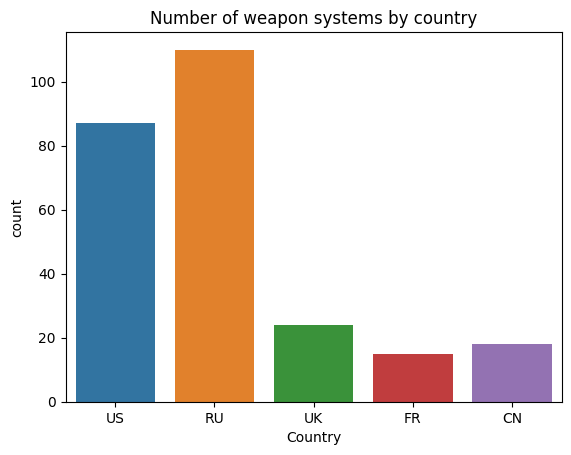

In [11]:
sns.countplot(x='Country', hue= 'Country', data= data, palette= 'tab10')
plt.title('Number of weapon systems by country')
plt.show()

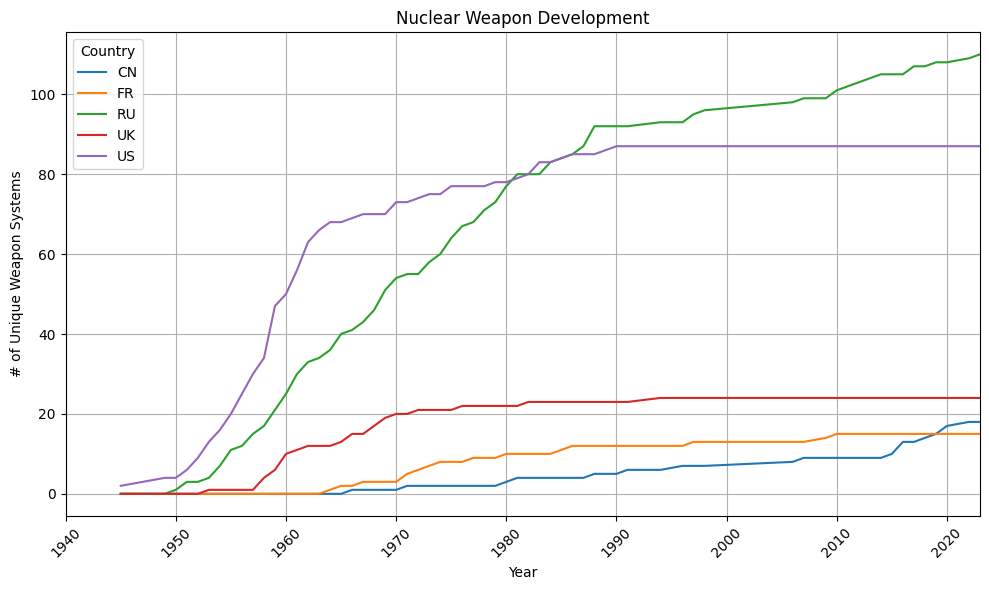

In [12]:


data['Introduced'] = pd.to_datetime(data['Introduced'], format='%Y')


country_counts = data.groupby(['Country', 'Introduced']).size().unstack('Country').fillna(0)

start_date = data['Introduced'].min() - pd.DateOffset(years=5)

cumulative_counts = country_counts.cumsum()

plt.figure(figsize=(10, 6))
for country in cumulative_counts.columns:
    plt.plot(cumulative_counts.index, cumulative_counts[country], label=country)

plt.title('Nuclear Weapon Development')
plt.xlabel('Year')
plt.ylabel('# of Unique Weapon Systems')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(start_date, data['Introduced'].max())
plt.tight_layout()
plt.show()

In [13]:
cumulative_counts.columns


Index(['CN', 'FR', 'RU', 'UK', 'US'], dtype='object', name='Country')

19:30:06 - cmdstanpy - INFO - Chain [1] start processing


19:30:07 - cmdstanpy - INFO - Chain [1] done processing
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


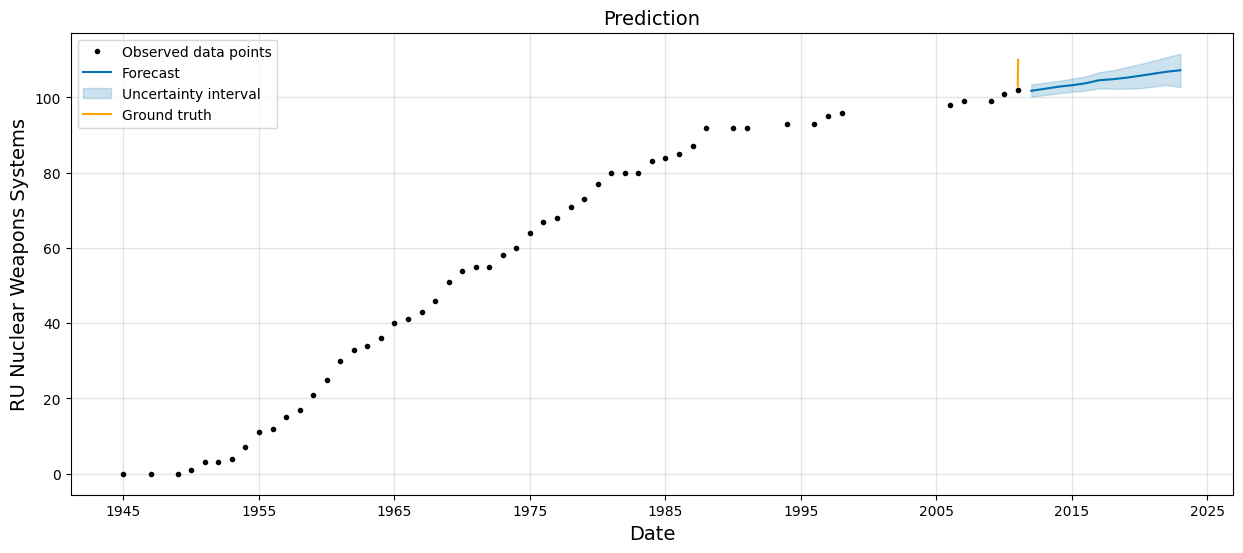

19:30:07 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


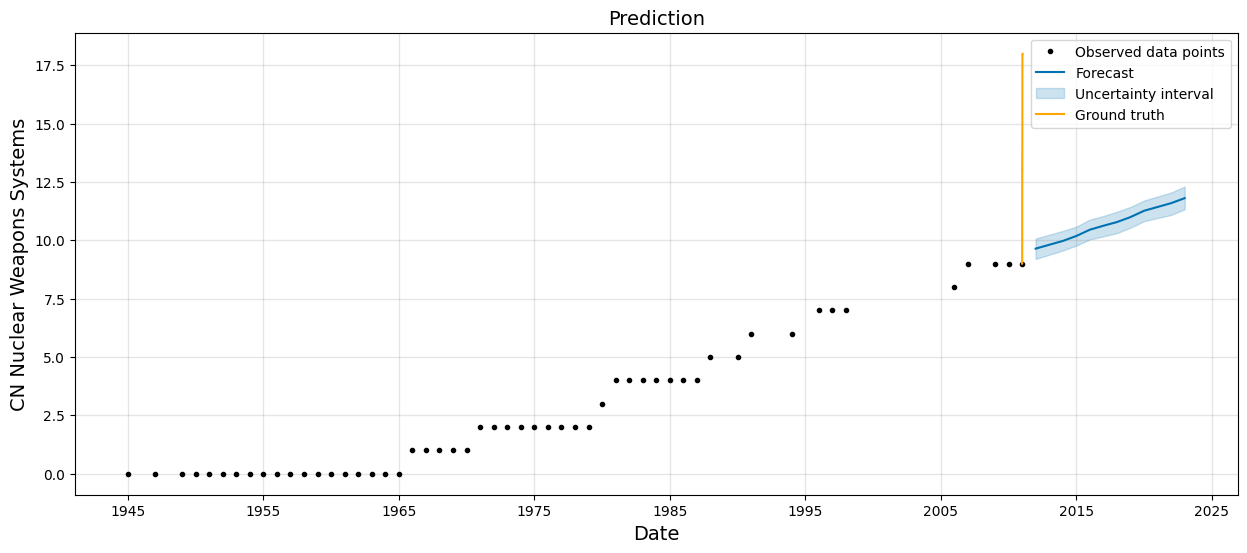

19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:08 - cmdstanpy - INFO - Chain [1] done processing
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


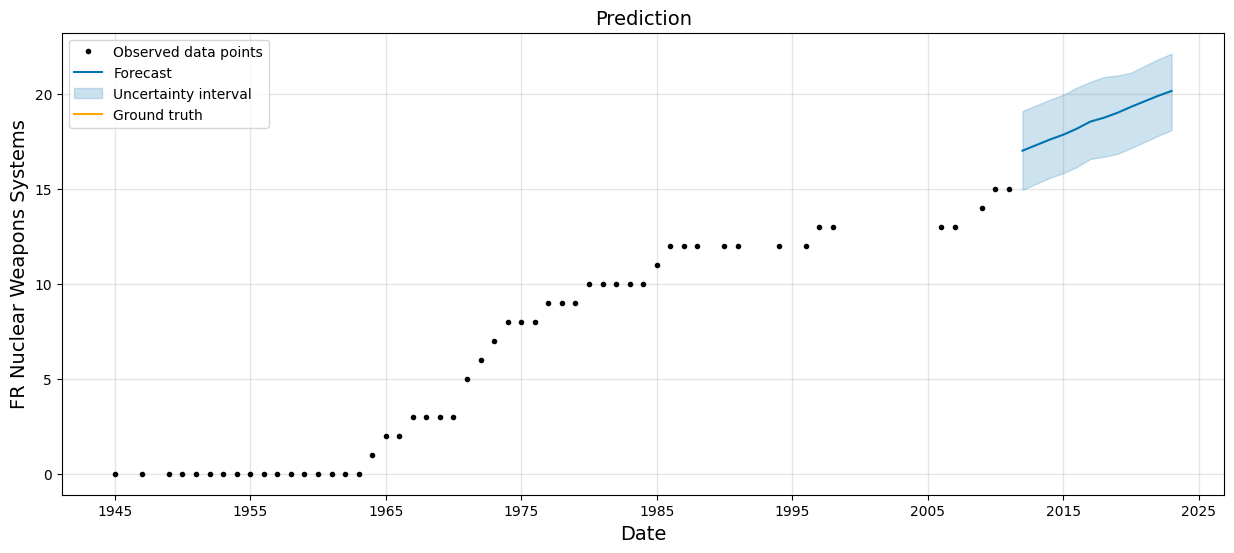

19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:08 - cmdstanpy - INFO - Chain [1] done processing
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


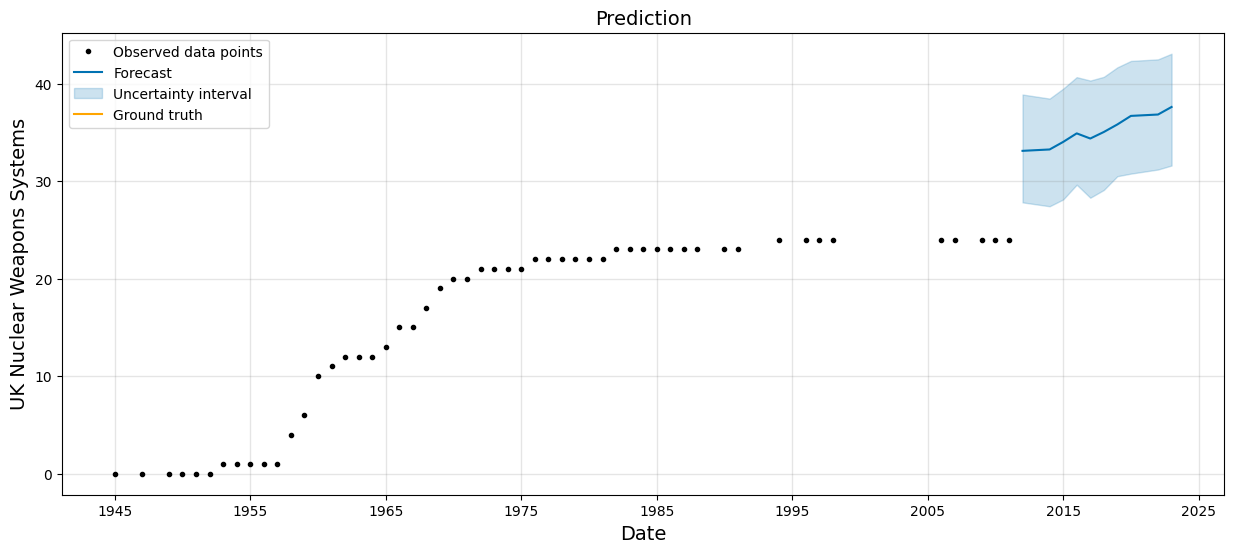

19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vscode/.local/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


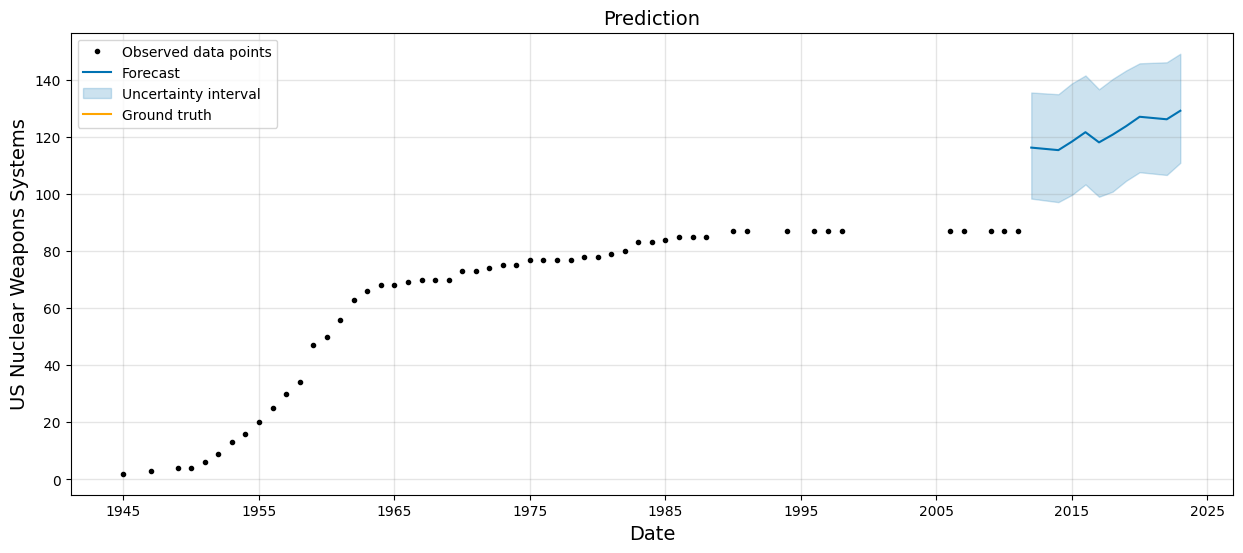

In [14]:
country_name = 'RU', 'CN', 'FR', 'UK', 'US'
for country in country_name:
    univariate_data = pd.DataFrame(cumulative_counts.index, cumulative_counts[country]).copy()
    transformed_ds = univariate_data.reset_index().rename(columns={country: 'y', 'Introduced': 'ds'})
    train_size = int(0.85 * len(transformed_ds))
    test_size = len(transformed_ds) - train_size

    train = transformed_ds.iloc[:train_size, :]

    x_train, y_train = pd.DataFrame(transformed_ds.iloc[:train_size, 1]), pd.DataFrame(transformed_ds.iloc[:train_size, 0])
    x_valid, y_valid = pd.DataFrame(transformed_ds.iloc[train_size:, 1]), pd.DataFrame(transformed_ds.iloc[train_size:, 0])

    model = Prophet()
    model.fit(train)


    y_pred = model.predict(x_valid)
    x_valid = model.make_future_dataframe(periods=365)

    end_date = data['Introduced'].max() + pd.DateOffset(years=5)
    f, ax = plt.subplots(1)
    f.set_figheight(6)
    f.set_figwidth(15)

    model.plot(y_pred, ax=ax)
    sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') 

    ax.set_title('Prediction', fontsize=14)
    ax.set_xlabel(xlabel='Date', fontsize=14)
    ax.set_ylabel(ylabel=f'{country} Nuclear Weapons Systems', fontsize=14)

    plt.show()
    
    filename = f'{country}nukepredictmodel.sav'

    pickle.dump(model, open(filename, 'wb'))
    